## Imports

In [44]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [45]:
# Carregar o dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

## Análise Exploratória

In [46]:
# Informações iniciais
print("Resumo do Dataset:")
print(df.info())
print("\nAmostra dos dados:")
print(df.head())
print("\nDescrição estatística:")
print(df.describe(include='all'))

Resumo do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF            

In [47]:
# Estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

<ipython-input-48-f7782825115e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="NObeyesdad", order=df["NObeyesdad"].value_counts().index, palette="viridis")


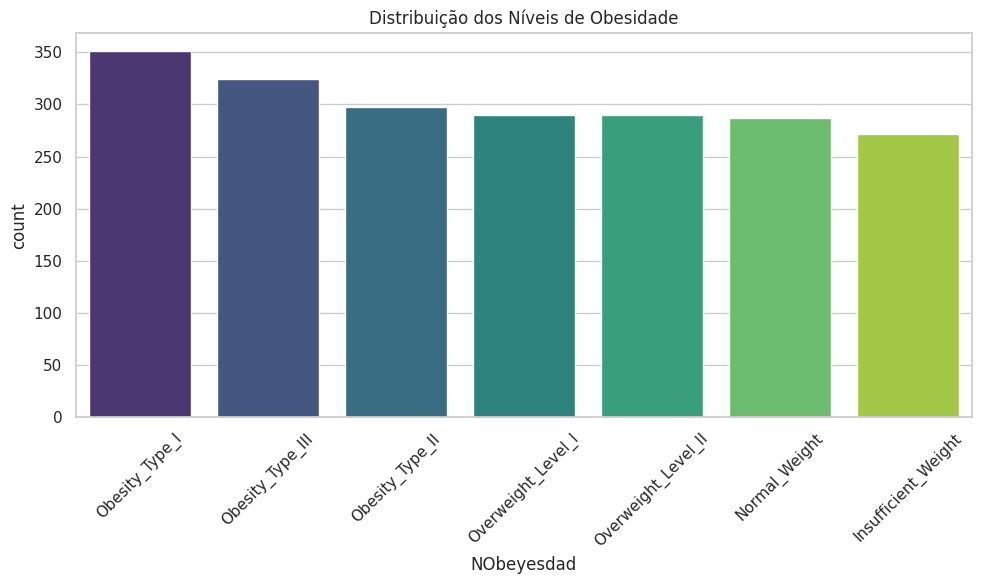

In [48]:
# 1. Distribuição da variável alvo
plt.figure()
sns.countplot(data=df, x="NObeyesdad", order=df["NObeyesdad"].value_counts().index, palette="viridis")
plt.title("Distribuição dos Níveis de Obesidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("grafico_distribuicao_obesidade.png")
plt.show()

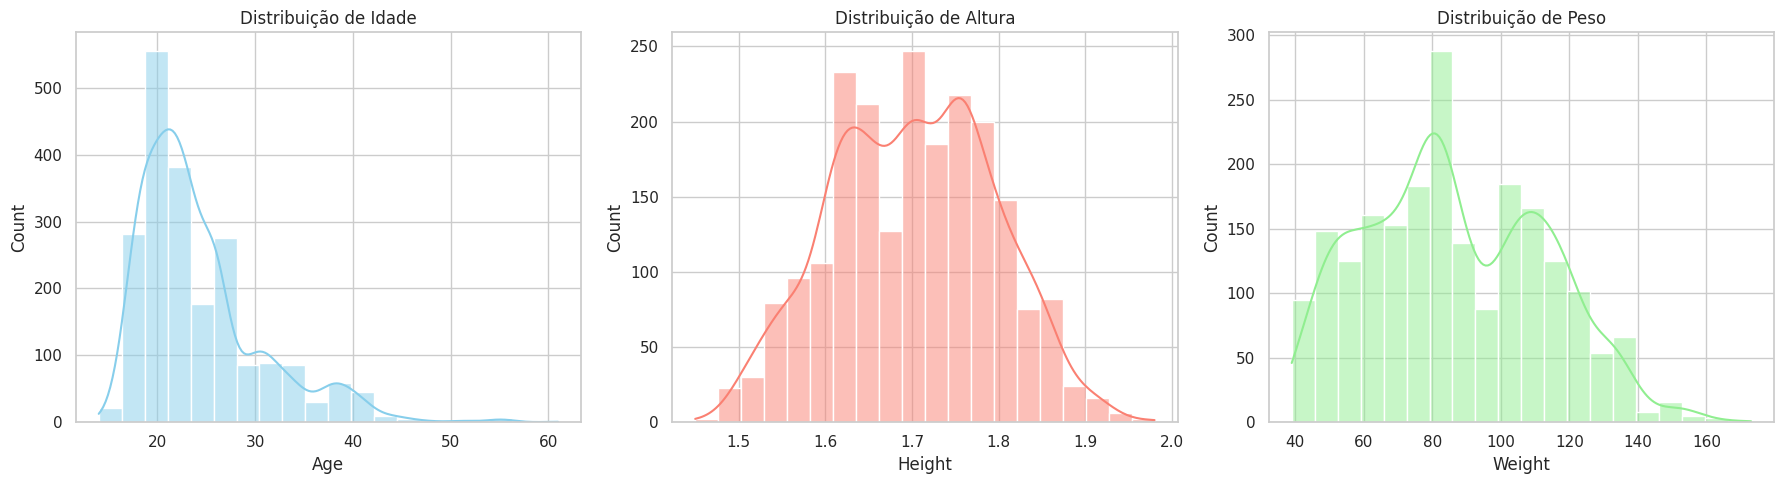

In [49]:
# 2. Histogramas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], kde=True, bins=20, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição de Idade')

sns.histplot(df['Height'], kde=True, bins=20, ax=axes[1], color='salmon')
axes[1].set_title('Distribuição de Altura')

sns.histplot(df['Weight'], kde=True, bins=20, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribuição de Peso')

plt.tight_layout()
plt.savefig("histogramas_idade_altura_peso.png")
plt.show()

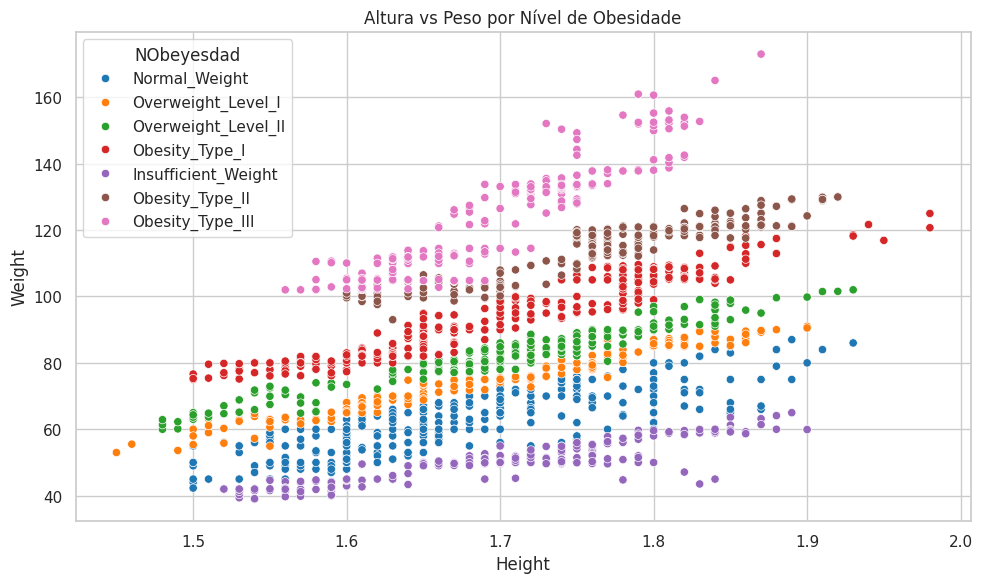

In [50]:
# 3. Altura vs Peso com cor por nível de obesidade
plt.figure()
sns.scatterplot(data=df, x='Height', y='Weight', hue='NObeyesdad', palette='tab10')
plt.title('Altura vs Peso por Nível de Obesidade')
plt.tight_layout()
plt.savefig("altura_vs_peso.png")
plt.show()

## Pré-Processamento

In [51]:
# Codificar a variável alvo (NObeyesdad)
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])  # salva classes como 0, 1, 2...

# Separar X e y
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# One-hot encoding nas variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Normalizar os dados numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Verificações rápidas
print(f"Tamanho treino: {X_train.shape}")
print(f"Tamanho teste: {X_test.shape}")

Tamanho treino: (1688, 23)
Tamanho teste: (423, 23)


## Modelagem


🔍 Modelo: Logistic Regression
Acurácia: 0.861
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        54
           1       0.80      0.71      0.75        58
           2       0.88      0.90      0.89        70
           3       0.92      0.95      0.93        60
           4       1.00      0.98      0.99        65
           5       0.71      0.71      0.71        58
           6       0.79      0.76      0.77        58

    accuracy                           0.86       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.86      0.86      0.86       423



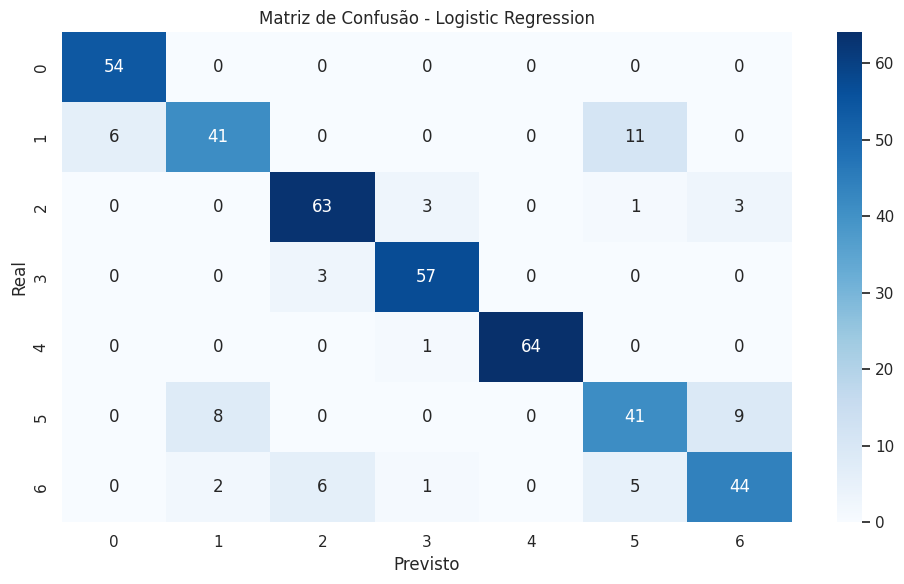


🔍 Modelo: Decision Tree
Acurácia: 0.939
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        54
           1       0.86      0.93      0.89        58
           2       0.94      0.94      0.94        70
           3       0.97      0.95      0.96        60
           4       1.00      0.98      0.99        65
           5       0.92      0.93      0.92        58
           6       0.92      0.95      0.93        58

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



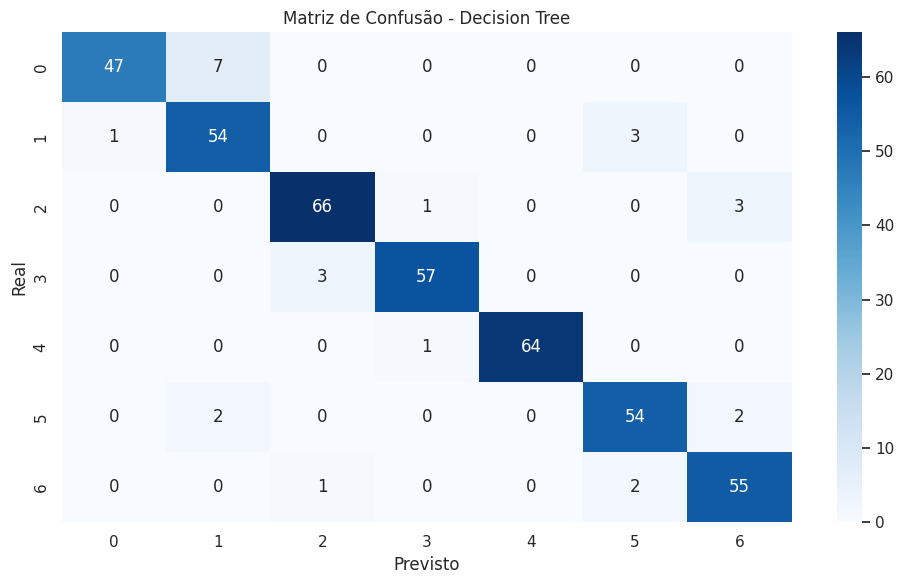


🔍 Modelo: Random Forest
Acurácia: 0.943
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.78      0.97      0.86        58
           2       0.93      0.97      0.95        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.96      0.83      0.89        58
           6       0.98      0.91      0.95        58

    accuracy                           0.94       423
   macro avg       0.95      0.94      0.94       423
weighted avg       0.95      0.94      0.94       423



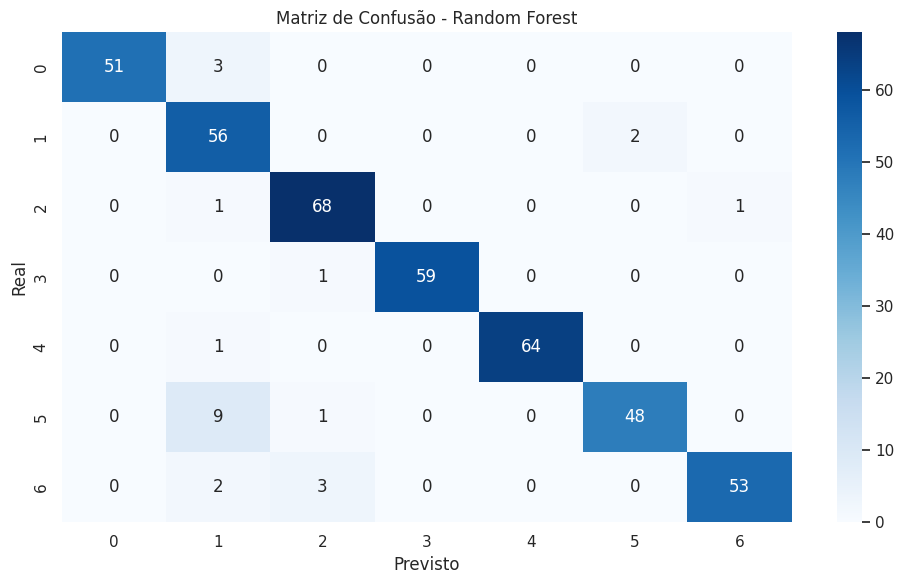


🔍 Modelo: KNN
Acurácia: 0.794
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        54
           1       0.60      0.52      0.56        58
           2       0.75      0.87      0.81        70
           3       0.87      0.90      0.89        60
           4       0.97      0.98      0.98        65
           5       0.74      0.59      0.65        58
           6       0.80      0.71      0.75        58

    accuracy                           0.79       423
   macro avg       0.79      0.79      0.78       423
weighted avg       0.79      0.79      0.79       423



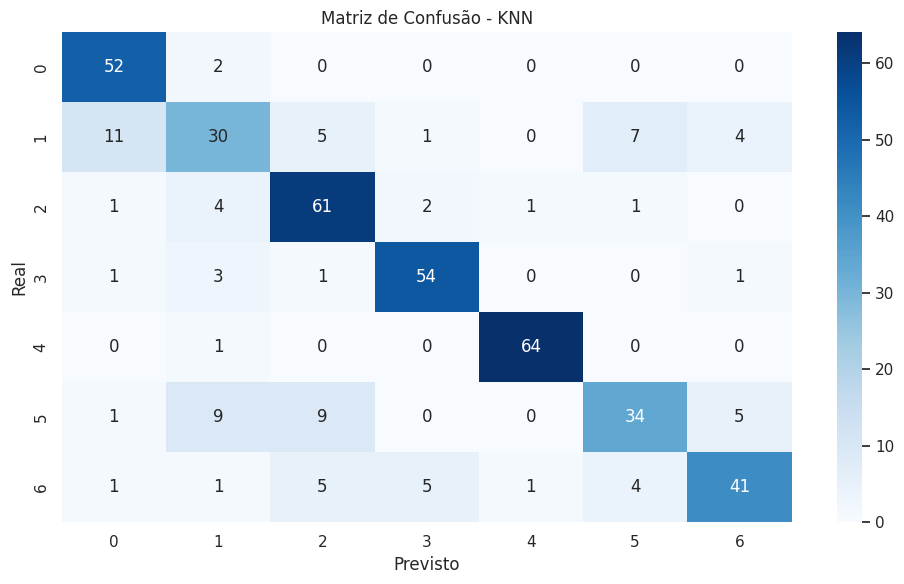


🔍 Modelo: SVM
Acurácia: 0.846
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        54
           1       0.60      0.71      0.65        58
           2       0.89      0.90      0.89        70
           3       0.95      0.93      0.94        60
           4       1.00      0.98      0.99        65
           5       0.76      0.72      0.74        58
           6       0.81      0.72      0.76        58

    accuracy                           0.85       423
   macro avg       0.85      0.84      0.84       423
weighted avg       0.85      0.85      0.85       423



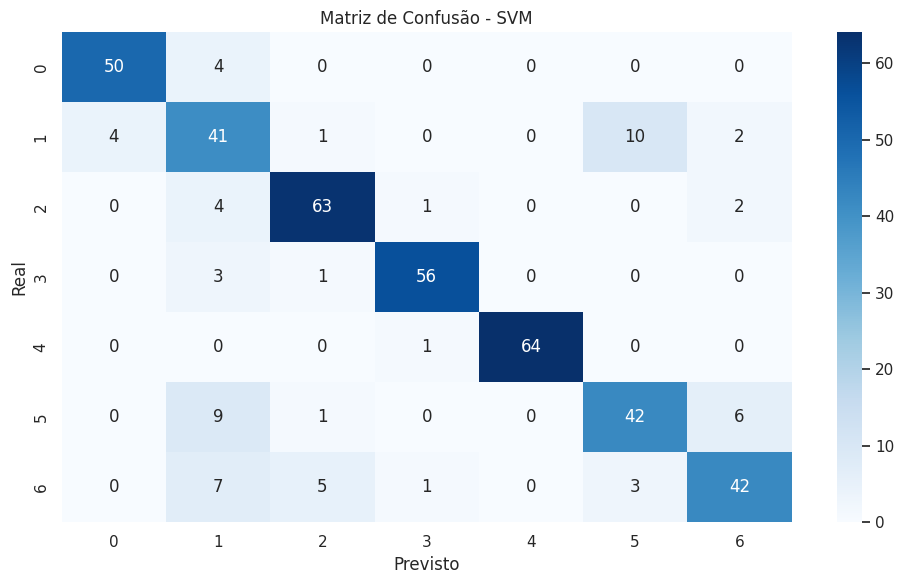

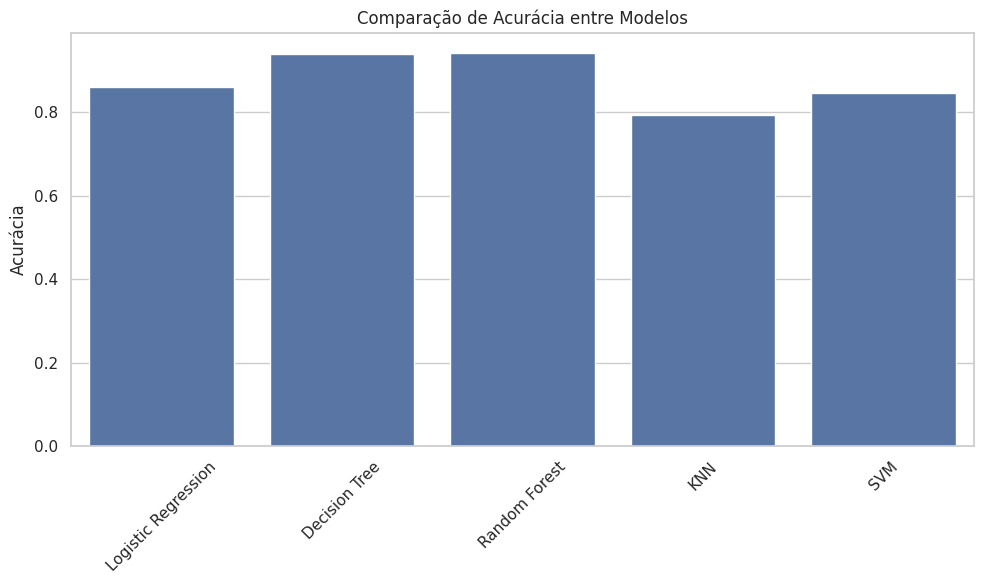

In [52]:
# Modelos a serem testados
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

resultados = {}

# Treinar e avaliar
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nome] = acc
    print(f"\n🔍 Modelo: {nome}")
    print("Acurácia:", round(acc, 3))
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    plt.figure()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.savefig(f"matriz_confusao_{nome.replace(' ', '_').lower()}.png")
    plt.show()

# Comparação final de acurácia
plt.figure()
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()))
plt.title("Comparação de Acurácia entre Modelos")
plt.ylabel("Acurácia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("comparacao_modelos.png")
plt.show()


## Tuning de Hiperparâmetros no Random Forest

In [ ]:
# Definir o modelo base
rf = RandomForestClassifier(random_state=42)

# Grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearch com validação cruzada
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1)

# Treinar
grid_search.fit(X_train, y_train)

# Resultados
print("\n✅ Melhor combinação de hiperparâmetros:")
print(grid_search.best_params_)

# Avaliar no conjunto de teste
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Acurácia no conjunto de teste: {acc:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest Otimizado')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.savefig("matriz_confusao_rf_otimizado.png")
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits


## Salvando o modelo


In [ ]:
# Salvar o modelo treinado
joblib.dump(best_rf, 'modelo_random_forest.pkl')

# (Opcional) Salvar o scaler usado no pré-processamento
joblib.dump(scaler, 'scaler.pkl')

print("📦 Modelo e scaler salvos com sucesso!")
